In [5]:
# Step 1: Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Step 2: Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values   # Customer Income, Spending Score (1-100)

<IPython.core.display.Javascript object>


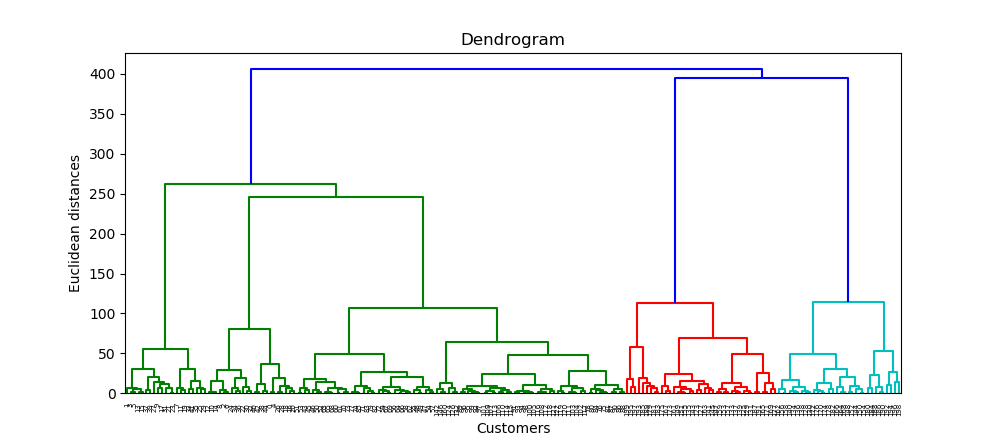

In [8]:
# Step 3: Using the dendrogram to find the optimal number of clusters
%matplotlib notebook

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(      # To plot HC as a dendogram
        sch.linkage(X,                      # agglomerative clustering algorithm.
                    method = 'ward'))       # uses the Ward variance minimization algorithm
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
# Step 4: Fitting Hierarchical Clustering to the dataset 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,  # No. of clusters 
                             affinity = 'euclidean',   # To compute linkgae with euclideam distance
                             linkage = 'ward')          # Which linkage criterion to use. The linkage
                                                        #   criterion determines which distance to use
                                                        #   between sets of observation. The algorithm
                                                        #   will merge the pairs of cluster that minimize
                                                        #   this criterion.
y_hc = hc.fit_predict(X)    # Performs clustering on X

<IPython.core.display.Javascript object>


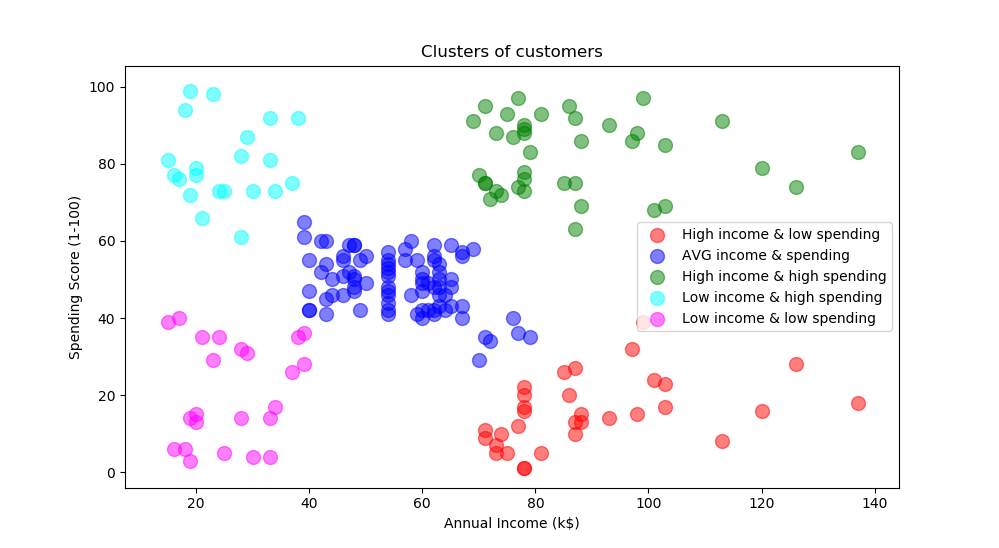

In [10]:
# Step 5: Visualising the clusters
plt.scatter(X[y_hc==0, 0],  # y_hc==0 > All values in array == 0, col=0(Annual Income)
            X[y_hc==0, 1],  # y_hc==0 > All values in array == 0, col=1(Spending score (1-100))
            s=100,  # Size for each data spot for scatter 
            c='red', # Color of each data spot for scatter
            alpha=0.5, # To shade each spot
            label='High income & low spending') # Text for thisspecific data spot
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', alpha=0.5, label = 'AVG income & spending')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', alpha=0.5, label = 'High income & high spending')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', alpha=0.5, label = 'Low income & high spending')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', alpha=0.5, label = 'Low income & low spending')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()